# Econométrie
Les facteurs de la variation de la consommation des ménages sur un aspect macro-économique
___
On suppose que le taux de croissance de la consommation des ménages du dépenddu taux de croissance des revenus, du taux d'épargne, du taux de croissance du PIB, du taux de chômage et d'emploi, du taux des impôts par rapport au PIB et du taux d’inflation.

Cette spécifiaction se traduit par:
$$ \textrm{CONSO} \sim \beta_0 + \textrm{CHOM}\, \beta_1 + \textrm{EMPLOI}\, \beta_2 + \textrm{EPARGNE}\, \beta_3 + \textrm{IMPOT}\, \beta_4 + \textrm{INFL}\, \beta_5 + \textrm{PIB}\, \beta_6 + \textrm{REVENU}\, \beta_7$$

Nous analyserons les données de 48 pays en 2015.

In [49]:
chomage <- read.csv("DP_chomage.csv", encoding = "UTF-8")[, c(1, 7)]
names(chomage) <- c("PAYS", "CHOM")

conso <- read.csv("DP_conso.csv", encoding = "UTF-8")[, c(1, 7)]
names(conso) <- c("PAYS", "CONSO")

emploi <- read.csv("DP_emploi.csv", encoding = "UTF-8")[, c(1, 7)]
names(emploi) <- c("PAYS", "EMPLOI")

epargne <- read.csv("DP_epargne_revenu.csv", encoding = "UTF-8")[, c(1, 7)]
names(epargne) <- c("PAYS", "EPARGNE")

impot <- read.csv("DP_impot_PIB.csv", encoding = "UTF-8")[, c(1, 7)]
names(impot) <- c("PAYS", "IMPOT")

inflation <- read.csv("DP_inflation_IPC.csv", encoding = "UTF-8")[, c(1, 7)]
names(inflation) <- c("PAYS", "INFL")

pib <- read.csv("DP_PIB.csv", encoding = "UTF-8")[, c(1, 7)]
names(pib) <- c("PAYS", "PIB")

revenu <- read.csv("DP_revenu.csv", encoding = "UTF-8")[, c(1, 7)]
names(revenu) <- c("PAYS", "REVENU")

data <- Reduce(function(x, y) merge(x, y), list(chomage, conso, emploi, epargne, 
    impot, inflation, pib, revenu))

In [51]:
summary(data)

      PAYS         CHOM            CONSO            EMPLOI     
 ARG    : 1   Min.   : 2.783   Min.   :-9.730   Min.   :43.68  
 AUS    : 1   1st Qu.: 5.299   1st Qu.: 1.929   1st Qu.:61.67  
 AUT    : 1   Median : 6.817   Median : 2.713   Median :66.70  
 BEL    : 1   Mean   : 8.073   Mean   : 2.538   Mean   :66.05  
 BGR    : 1   3rd Qu.: 9.182   3rd Qu.: 3.689   3rd Qu.:72.02  
 BRA    : 1   Max.   :25.350   Max.   : 8.014   Max.   :85.00  
 (Other):42                                                    
    EPARGNE            IMPOT             INFL              PIB        
 Min.   :-15.466   Min.   : 2.006   Min.   :-1.7360   Min.   :-3.546  
 1st Qu.:  2.994   1st Qu.: 5.614   1st Qu.:-0.0505   1st Qu.: 1.780  
 Median :  7.475   Median : 9.025   Median : 0.5379   Median : 2.543  
 Mean   : 10.394   Mean   : 9.342   Mean   : 1.7405   Mean   : 3.153  
 3rd Qu.: 16.391   3rd Qu.:11.855   3rd Qu.: 1.7148   3rd Qu.: 3.903  
 Max.   : 37.065   Max.   :28.900   Max.   :15.5344   Max.   :

In [59]:
cor(data[,2:9])

,CHOM,CONSO,EMPLOI,EPARGNE,IMPOT,INFL,PIB,REVENU
CHOM,1.00000000,-0.13397086,-0.58777920,-0.49379659,0.20358720,-0.1010654,-0.06637998,-0.12313526
CONSO,-0.13397086,1.00000000,0.09940944,0.31905838,-0.16233114,-0.4181688,0.45026034,0.73838456
EMPLOI,-0.58777920,0.09940944,1.00000000,0.09217003,-0.05807409,-0.2135892,0.01671809,0.13412641
EPARGNE,-0.49379659,0.31905838,0.09217003,1.00000000,-0.03871985,0.3303075,0.17812448,0.20769414
IMPOT,0.20358720,-0.16233114,-0.05807409,-0.03871985,1.00000000,0.1718968,-0.13948537,0.05558583
INFL,-0.10106538,-0.41816875,-0.21358925,0.33030750,0.17189676,1.0000000,-0.16886519,-0.36525989
PIB,-0.06637998,0.45026034,0.01671809,0.17812448,-0.13948537,-0.1688652,1.00000000,0.38258222
REVENU,-0.12313526,0.73838456,0.13412641,0.20769414,0.05558583,-0.3652599,0.38258222,1.00000000


In [60]:
model1 <- lm(CONSO~., data = data[,2:9])
summary(model1)


Call:
lm(formula = CONSO ~ ., data = data[, 2:9])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4260 -0.6059  0.1077  1.0403  2.9529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.988685   2.853007   0.347   0.7308    
CHOM         0.042943   0.072880   0.589   0.5590    
EMPLOI      -0.006819   0.035502  -0.192   0.8487    
EPARGNE      0.068269   0.025974   2.628   0.0121 *  
IMPOT       -0.062681   0.045456  -1.379   0.1756    
INFL        -0.209485   0.088287  -2.373   0.0226 *  
PIB          0.084730   0.065987   1.284   0.2065    
REVENU       0.574356   0.116217   4.942 1.42e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.558 on 40 degrees of freedom
Multiple R-squared:  0.6823,	Adjusted R-squared:  0.6267 
F-statistic: 12.27 on 7 and 40 DF,  p-value: 2.963e-08


In [63]:
model2 <- lm(CONSO~EPARGNE+INFL+REVENU, data = data)
summary(model2)


Call:
lm(formula = CONSO ~ EPARGNE + INFL + REVENU, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3726 -0.6430  0.0685  0.7858  3.1736 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.58903    0.42618   1.382  0.17391    
EPARGNE      0.06753    0.02264   2.983  0.00464 ** 
INFL        -0.24130    0.08278  -2.915  0.00558 ** 
REVENU       0.58868    0.10978   5.362 2.89e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.575 on 44 degrees of freedom
Multiple R-squared:  0.6429,	Adjusted R-squared:  0.6185 
F-statistic:  26.4 on 3 and 44 DF,  p-value: 6.343e-10


In [72]:
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
40,97.13993,NA,NA,NA,NA
44,109.18592,-4,-12.04598,1.240065,0.3094966


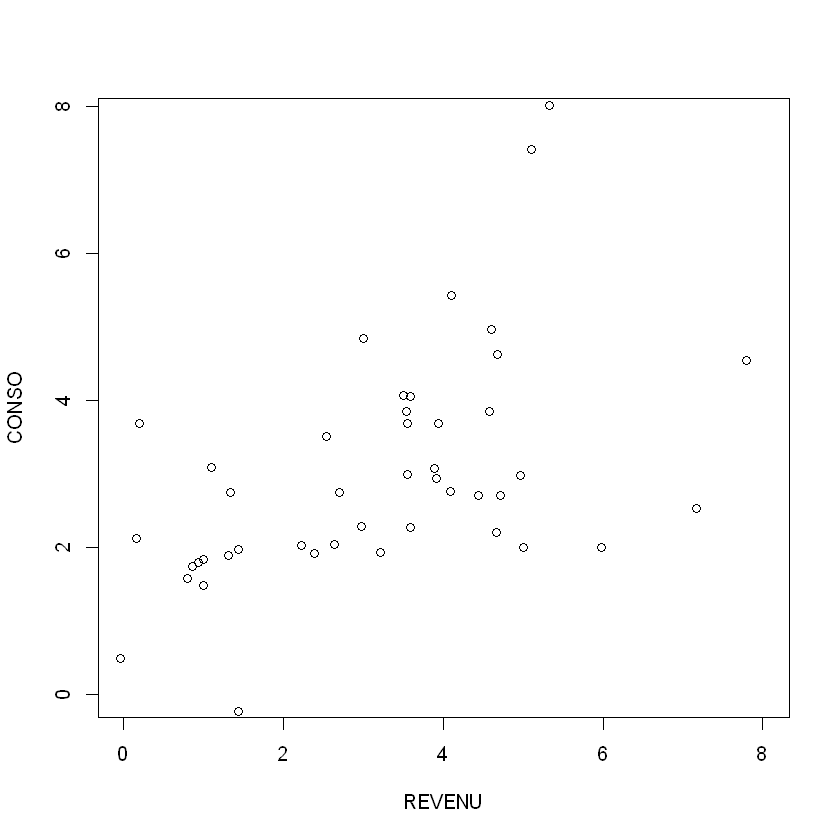

In [95]:
plot(CONSO~REVENU, data = data,
     ylim = c(0, max(REVENU)),
     xlim = c(0, max(CONSO))
    )